# Draft 0

ref: https://gist.github.com/brentp/089c7d6d69d78d26437f

## All Imports

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families import Gamma

## Kaggle data

In [2]:
df = pd.read_csv("data/kaggle_house/train.csv").dropna(1)
display(HTML(df.head(2).to_html()))

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


## Re-scaling y to $[0,1]$

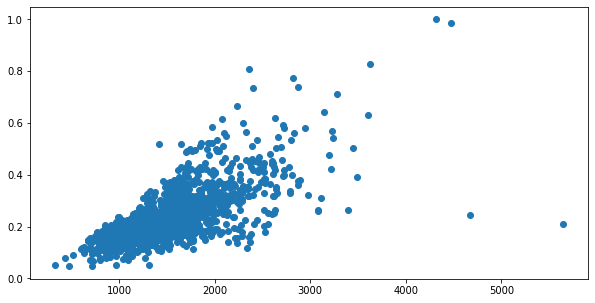

In [3]:
y = df.SalePrice / df.SalePrice.max()
X = df.GrLivArea
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(X,y, "o");

## Testing the GLM class

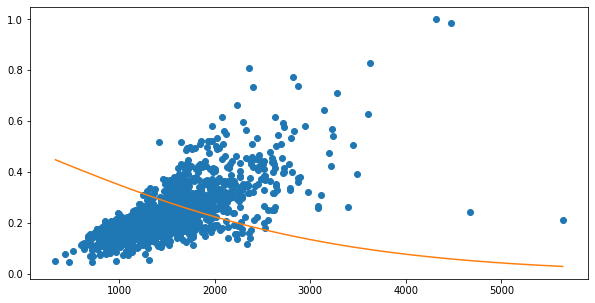

In [4]:
glm = sm.GLM(y, X, family=Binomial()).fit()
space = np.linspace(X.min(), X.max(), X.shape[0])
pred = glm.predict(space)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(X,y, "o");
plt.plot(space,pred, "-");

## Try to understand `GenericLikelihoodModel`

In [5]:
start_params = sm.GLM(y, X, family=Binomial()).fit(disp=False).params
print(start_params )

probit_mod = sm.Probit(y, X)
probit_res = probit_mod.fit()
loglike = probit_mod.loglike

maxiter=100000
maxfun=5000
method='bfgs'


g = GenericLikelihoodModel(y,X, loglike=loglike).fit(start_params=start_params,
                                                 maxiter=maxiter,
                                                 maxfun=maxfun,
                                                 method=method)

GrLivArea   -0.000619
dtype: float64
Optimization terminated successfully.
         Current function value: nan
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.177792
         Iterations: 8
         Function evaluations: 15
         Gradient evaluations: 15


/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2125: RuntimeWarning: divide by zero encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
